In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from evalutation.plotting.plotting import PLOTTER
from data_prep.data_preparation import DATA_PREP
from data_loader.lfp_loader import LFP_LOADER

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


In [2]:
pltr = PLOTTER()

<Figure size 774x270 with 0 Axes>

In [3]:
b = 1
c = (10,1)
splits = [1,2,3,4,5]

#path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
#path_sklearn = "../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_25-14_18_11/"
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0]

#channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 14, 14, 14, 14, 16, 16, 36, 36, 40]
csc = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 16, 16, 36, 36, 40, 57, 57, 57, 58, 58, 58, 59, 60, 61, 61, 61, 63, 63, 64, 79, 79, 79, 80, 80, 80]
#units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 38, 39, 40, 41, 44, 45, 69, 70, 83]
units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83, 96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]
n_channels = len(csc)
n_splits = len(splits)
n_units = len(units)

In [4]:
trials = []
for a in alphas: 
    csc = "5-40"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    csc = "57-80"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    
    L1_trial_df = pd.DataFrame({
        "costs" : np.mean([L1_trial_df1.costs, L1_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L1_trial_df1.theta.values.tolist()), 
             np.array(L1_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L1_trial_df1.losses.values.tolist()), 
             np.array(L1_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L1_trial_df1.preds.values.tolist()), 
             np.array(L1_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L2_trial_df = pd.DataFrame({
        "costs" : np.mean([L2_trial_df1.costs, L2_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L2_trial_df1.theta.values.tolist()), 
             np.array(L2_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L2_trial_df1.losses.values.tolist()), 
             np.array(L2_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L2_trial_df1.preds.values.tolist()), 
             np.array(L2_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L1_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L1_trial_df["losses"].values.tolist()).flatten(), 
        "validation costs\nper unit [NLL]" : np.array(L1_trial_df["preds"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L2_trial_df["losses"].values.tolist()).flatten(), 
        "validation costs\nper unit [NLL]" : np.array(L2_trial_df["preds"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    trial_exp_df = pd.concat([L1_trial_exp_df, L2_trial_exp_df], ignore_index=True)
    
    trials.append(trial_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
exp_df.head()

,losses [NLL],validation costs\nper unit [NLL],splits,unit,alpha,regularization
0,0.020312,0.020915,1,8,0.0,L1
1,0.007911,0.009677,1,9,0.0,L1
2,0.001621,0.002980,1,10,0.0,L1
3,0.002373,0.002496,1,12,0.0,L1
4,0.001565,0.001754,1,17,0.0,L1


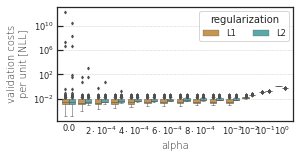

In [65]:
fig3, ax = pltr.plot_reg_losses_bp(exp_df)

#print(ax.get_xticklabels())
xticks = ax.get_xticks()
#xticklabels = [f'$10^{{{np.log10(i)}}}$' if i!=0.0 else '0' for i in alphas]
#xticklabels = [xticklabels[0]] + [xticklabels[i] if np.log10(alphas)[i] % 1 == 0 else '' for i in range(1, len(alphas))]
#xticklabels = [f'$10^{{{int(i)}}}$' if i!=-10.0 else '0.0' for i in xticks]
xticklabels = ['0.0', '', '$2\cdot10^{-4}$', '', '$4\cdot10^{-4}$', '', '$6\cdot10^{-4}$', '', '$8\cdot 10^{-4}$', '', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)


plt.semilogy()
#plt.semilogx()

plt.subplots_adjust(
    left=0.17, bottom=0.2, right=0.99, top=0.99
)
fig3.savefig('plots/plot5.png')
fig3.savefig('plots/plot5.pdf')

In [56]:
pres = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print(np.array(ax.get_xticklabels()))
xticks = ax.get_xticks()
print(xticks)
xticklabels = [f'$10^{{{int(np.floor(np.log10(i)))}}}$' if i!=0.0 else '0.0' for i in alphas]
xticklabels = [xticklabels[0]] + [f"{pres[i]}$\cdot${xticklabels[i]}" if np.log10(alphas)[i] % 1 == 0 else '' for i in range(1, len(alphas))]
print(xticklabels)

[Text(0, 0, '0.0') Text(1, 0, '0.0001') Text(2, 0, '0.0002')
 Text(3, 0, '0.0003') Text(4, 0, '0.0004') Text(5, 0, '0.0005')
 Text(6, 0, '0.0006') Text(7, 0, '0.0007') Text(8, 0, '0.0008')
 Text(9, 0, '0.0009') Text(10, 0, '0.001') Text(11, 0, '0.01')
 Text(12, 0, '0.1') Text(13, 0, '1.0')]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
['0.0', '-2.5e-05$10^{-4}$', '', '', '', '', '', '', '', '', '-0.0003333333333333333$10^{-3}$', '-0.005$10^{-2}$', '-0.1$10^{-1}$', 'inf$10^{0}$']


/tmp/ipykernel_56365/3022207975.py:5: RuntimeWarning: divide by zero encountered in log10
  xticklabels = [xticklabels[0]] + [f"{alphas[i]/np.floor(np.log10(alphas[i]))}{xticklabels[i]}" if np.log10(alphas)[i] % 1 == 0 else '' for i in range(1, len(alphas))]
/tmp/ipykernel_56365/3022207975.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  xticklabels = [xticklabels[0]] + [f"{alphas[i]/np.floor(np.log10(alphas[i]))}{xticklabels[i]}" if np.log10(alphas)[i] % 1 == 0 else '' for i in range(1, len(alphas))]


In [34]:
['0.0', '$10^{-4}$', '', '', '$4\cdot10^{-4}$', '', '6\cdot$10^{-4}$', '', '$8\cdot 10^{-4}$', '', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$']

/tmp/ipykernel_56365/3313266315.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(alphas)[3] % 1


0.4771212547196626

TypeError: only integer scalar arrays can be converted to a scalar index